<a href="https://colab.research.google.com/github/felipe-gm/portfolio/blob/master/fisica_computacional/erros_euler_rk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import sin, cos, exp, log2
from numpy import arange
import matplotlib.pyplot as plt

# Equacao diferencial

In [ ]:
def f(x,t):
  return -2*exp(-gamma*t)*(gamma*cos(t)+sin(t))

# Solucao exata da equacao diferencial

In [ ]:
def x_exato(t,gama,x0=0): return x0-2+2*exp(-gamma*t)*cos(t)

# Integracao numerica e calculo de erros

In [ ]:
def main(gamma,N):
  """Integra numericamente a equação diferencial
    dx/dt=−2exp(−γt)(γcost+sent),
  no intervalo entre t=0 e t=10, utilizando tanto o método de Euler quanto
  o metodo de Runge-Kutta de segunda ordem. Utilizando como condicao 
  inicial x(0)=0. Calcula o erro medio associado ao calculo.
  """
  a = .0
  b = 10.
  h = (b-a)/N

  t_euler = arange(a,b,h)
  x_euler = []
  x = .0
  for t in t_euler:
    x_euler.append(x)
    x += h*f(x,t)

  t_rk2 = arange(a,b,h)
  x_rk2 = []
  x = .0
  for t in t_rk2:
    x_rk2.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

  erro_euler = ((1/N)*sum([(x_euler[n]-x_exato(n*h,gamma))**2 for n in range(N)]))**(1/2)
  erro_rk2 = ((1/N)*sum([(x_rk2[n]-x_exato(n*h,gamma))**2 for n in range(N)]))**(1/2)

  return erro_euler, erro_rk2

# Teste gamma = 1

In [ ]:
gamma = 1

## Listas de erros

In [ ]:
exercise_set = [8,16,32,64,128,256,512,1024]
error_lists = {'euler':[], 'rk2':[]}
for N in exercise_set:
  error_euler, error_rk2 = main(gamma,N)
  error_lists['euler'].append(error_euler)
  error_lists['rk2'].append(error_rk2)

## Plot log-log

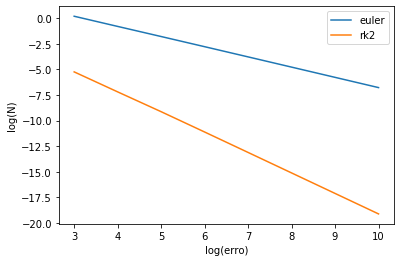

In [ ]:
log_N = [log2(N) for N in exercise_set]
plt.plot(log_N, [log2(err) for err in error_lists['euler']], label='euler')
plt.plot(log_N, [log2(err) for err in error_lists['rk2']], label='rk2')
plt.xlabel("log(erro)")
plt.ylabel("log(N)")
plt.legend()
plt.show()

# Teste gamma = 0

In [ ]:
gamma = 0

## Listas de erros

In [ ]:
exercise_set = [8,16,32,64,128,256,512,1024]
error_lists = {'euler':[], 'rk2':[]}
for N in exercise_set:
  error_euler, error_rk2 = main(gamma,N)
  error_lists['euler'].append(error_euler)
  error_lists['rk2'].append(error_rk2)

## Plot log-log

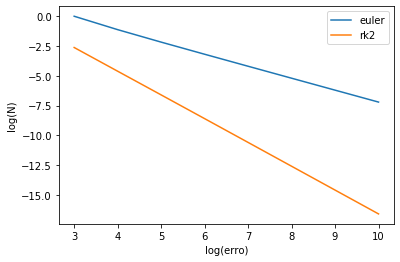

In [ ]:
log_N = [log2(N) for N in exercise_set]
plt.plot(log_N, [log2(err) for err in error_lists['euler']], label='euler')
plt.plot(log_N, [log2(err) for err in error_lists['rk2']], label='rk2')
plt.xlabel("log(erro)")
plt.ylabel("log(N)")
plt.legend()
plt.show()

# Os valores do expoente alpha dependem de gamma?

Uma estimativa visual dos graficos log-log acusam que o valor de alpha nao

depende do parametro gamma, mas apenas do metodo de integracao. 